In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf
tf.__version__

'2.8.2'

In [3]:
import pandas_datareader as web
!pip install yfinance --upgrade --no-cache-dir 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 20.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import yfinance as yf

In [13]:
df =yf.download('CANBK.NS', start='2019-01-01', end='2022-08-1',progress=False)

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,276.500000,283.399994,274.299988,281.500000,272.218994,5419071
2019-01-02,280.200012,283.700012,273.600006,275.399994,266.320099,5644563
2019-01-03,275.899994,278.399994,273.350006,276.299988,267.190430,3993439
2019-01-04,278.000000,285.500000,274.200012,282.950012,273.621185,6138056
2019-01-07,284.700012,286.450012,276.850006,278.250000,269.076141,3551975
...,...,...,...,...,...,...
2022-07-25,229.250000,234.500000,220.649994,224.800003,224.800003,27755911
2022-07-26,225.899994,226.399994,220.250000,221.600006,221.600006,10147905
2022-07-27,221.100006,227.949997,220.750000,227.050003,227.050003,8536507


In [15]:
df = df['Open'].values
df = df.reshape(-1,1)
print(df.shape)
df[:7]

(886, 1)


array([[276.5       ],
       [280.20001221],
       [275.8999939 ],
       [278.        ],
       [284.70001221],
       [277.8999939 ],
       [289.        ]])

In [18]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [19]:
dataset_test.shape

(228, 1)

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.90707162],
       [0.92384412],
       [0.90435174],
       [0.91387126],
       [0.94424303],
       [0.91341792],
       [0.96373527]])

In [21]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.37443336],
       [0.38644602],
       [0.37601997],
       [0.38667269],
       [0.3821396 ],
       [0.36128742],
       [0.36536718]])

In [22]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [23]:
x_train,y_train = create_my_dataset(dataset_train)
x_train[:1]


array([[0.90707162, 0.92384412, 0.90435174, 0.91387126, 0.94424303,
        0.91341792, 0.96373527, 0.92633726, 0.93155029, 0.91500453,
        0.92633726, 0.90593835, 0.90435174, 0.91137811, 0.89573889,
        0.86400725, 0.84814143, 0.83454216, 0.85040798, 0.81414324,
        0.75022663, 0.77787851, 0.79442427, 0.79601088, 0.73708069,
        0.72348141, 0.70761559, 0.72370808, 0.72348141, 0.6906165 ,
        0.6736174 , 0.64913874, 0.66772437, 0.63508613, 0.62783315,
        0.63508613, 0.6736174 , 0.65775158, 0.66817771, 0.64641886,
        0.64641886, 0.6967362 , 0.7085222 , 0.75929281, 0.80938348,
        0.80009063, 0.81074343, 0.81368991, 0.84542155, 0.81504992]])

In [24]:
x_train[:1].shape

(1, 50)

In [25]:
x_test,y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.37443336, 0.38644602, 0.37601997, 0.38667269, 0.3821396 ,
        0.36128742, 0.36536718, 0.36536718, 0.36536718, 0.36264729,
        0.38621943, 0.42112422, 0.37443336, 0.36219403, 0.35992748,
        0.37080687, 0.38349954, 0.3748867 , 0.37896645, 0.38712603,
        0.41953761, 0.43517676, 0.45784222, 0.47869447, 0.47008162,
        0.45398913, 0.45602901, 0.46509519, 0.45602901, 0.51042611,
        0.50543968, 0.54125114, 0.56436987, 0.5158658 , 0.54714418,
        0.56482321, 0.55847691, 0.57388939, 0.55507709, 0.56459654,
        0.53603805, 0.62828649, 0.63281958, 0.67248413, 0.68563007,
        0.69605619, 0.76427924, 0.75067996, 0.72438802, 0.70988214]])

In [26]:
#x_train.shape
#(957,50,1)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(658, 50, 1)
(178, 50, 1)


In [27]:
model = Sequential()
model.add(LSTM(units=96,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 96)                74112     
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense (Dense)               (None, 1)                 9

In [29]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [30]:
if (not os.path.exists(r'C:\Users\USER\stock_prediction.h5')):
    model.fit(x_train,y_train, epochs=50, batch_size=32)
    model.save(r'C:\Users\USER\stock_prediction.h5')

Epoch 1/50
21/21 [==============================] - 6s 79ms/step - loss: 0.0325
Epoch 2/50
21/21 [==============================] - 2s 79ms/step - loss: 0.0069
Epoch 3/50
21/21 [==============================] - 2s 79ms/step - loss: 0.0061
Epoch 4/50
21/21 [==============================] - 2s 79ms/step - loss: 0.0046
Epoch 5/50
21/21 [==============================] - 2s 80ms/step - loss: 0.0045
Epoch 6/50
21/21 [==============================] - 2s 105ms/step - loss: 0.0044
Epoch 7/50
21/21 [==============================] - 2s 78ms/step - loss: 0.0044
Epoch 8/50
21/21 [==============================] - 2s 80ms/step - loss: 0.0041
Epoch 9/50
21/21 [==============================] - 2s 79ms/step - loss: 0.0041
Epoch 10/50
21/21 [==============================] - 2s 79ms/step - loss: 0.0041
Epoch 11/50
21/21 [==============================] - 2s 78ms/step - loss: 0.0033
Epoch 12/50
21/21 [==============================] - 2s 78ms/step - loss: 0.0034
Epoch 13/50
21/21 [=================

In [31]:
model = load_model(r'C:\Users\USER\stock_prediction.h5')

range(708, 886)


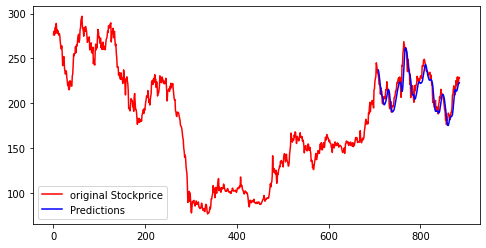

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig,ax = plt.subplots(figsize=(8,4))
plt.plot(df,color='red', label='original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions, color='blue',label='Predictions')
plt.legend()
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

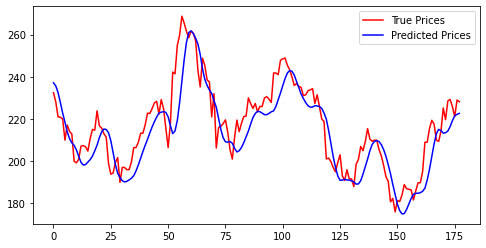

In [34]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red',label='True Prices')
plt.plot(predictions,color="blue",label = 'Predicted Prices')
plt.legend()

 Observations:
 The Stock prices of Canara Bank predicted shows almost similar treand compared to the original value and we can trance many over lapping instances from the graph which means the values are coinciding with the orignal values.
